            
#                 ETL

In [1]:
# ETL
#Importing libraries

import pandas as pd 
import json 
import seaborn as sns
sns.set()
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt 
import re
import numpy as np

#### To load and normalize the data into a dataframe from a nested json, using one column (flatten it) to extend into the dataframe:

    arguments:
    file = json file to load
    encode = encoding of said file
    path = column to be flattend to form the dataframe 
    depth = level to wich flaten said column, default is 0 (int)
    meta = other columns that should be added (unchanged)

In [2]:
def load_json(file, encode='utf8', path="", depth=0, meta=""):


    with open(file, encoding=encode) as file:

        data = json.load(file)

    df = pd.json_normalize(data, record_path=[path], max_level=depth, meta=meta)

    return df

In [3]:
def load_json(file, encode='utf8', path="", depth=0, meta=""):


    with open(file, encoding=encode) as file:

        data = json.load(file)

    df = pd.json_normalize(data, record_path=[path], max_level=depth, meta=meta)

    return df

In [4]:
#Loading user reviews: 

reviews = load_json("databases/australian_user_reviews_fixed_v2.json",path="reviews", meta="user_id")

In [5]:
#Loading user items: 

items_users = load_json("databases/australian_users_items_fixed_v2.json",path="items", meta=["user_id","steam_id"])

In [6]:
#Loading games: 

games = pd.read_json("databases/output_steam_games_fixed.json", encoding='utf8')

In [60]:
items_users.describe(include="all")

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
count,3065931,3065931,3.065931e+06,3.065931e+06,3065931
unique,10800,10771,NaN,NaN,28800
top,730,Counter-Strike: Global Offensive,NaN,NaN,phrostb
freq,22616,22616,NaN,NaN,7762
mean,NaN,NaN,1.027770e+03,1.231837e+01,NaN
std,NaN,NaN,5.662506e+03,1.678134e+02,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,3.700000e+01,0.000000e+00,NaN
75%,NaN,NaN,3.660000e+02,0.000000e+00,NaN


In [61]:
reviews.describe(include="all")

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
count,59298,59298,59298,59298,59298,59298,59298,59298
unique,186,1906,1015,3682,1344,2,55306,25455
top,,"Posted June 21, 2014.",,730,No ratings yet,True,good game,76561198094665607
freq,51147,225,53158,3758,30162,52467,100,20


In [62]:
games.describe(include="all")

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
count,32133,32133,32133,32133,32133,32133,32133,32133,32133,32133.00,32133.000000,3.213300e+04,32133
unique,8240,884,32095,30055,32133,3583,15396,32132,4650,163.00,NaN,NaN,10993
top,NaN,NaN,Soundtrack,NaN,http://store.steampowered.com/app/761140/Lost_...,NaN,"[Casual, Simulation]",http://steamcommunity.com/app/612880/reviews/?...,[Single-player],4.99,NaN,NaN,NaN
freq,8051,3282,3,2049,1,2066,1292,2,2794,4278.00,NaN,NaN,3298
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060592,4.517574e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238584,1.827140e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.292800e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4.520600e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,5.934000e+05,NaN


In [8]:
#Using the columns 'user_id' from 'user_items' to make an users index, this is because user_items
#contains every user in 'reviews' but not vice versa 

user_index = items_users[['user_id','steam_id']]
user_index = user_index.drop_duplicates()

#Now the column 'steam_id' is dropped from 'items_users' as it has no use there 

items_users = items_users.drop(columns=['steam_id'])

In [9]:
#The 'games' df ends up with a lot of NaN so here we cleanse it
# None of the other df has NaNs in them
print(games.shape)
games=games.dropna()
print(games.shape)

(120445, 13)
(32133, 13)


In [10]:
print(items_users.shape)
print(user_index.shape)

(3065931, 5)
(28800, 2)


In [11]:
print(reviews.shape)
reviews.head(10)

(59298, 8)


,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637
5,,"Posted November 29, 2013.",,239030,1 of 4 people (25%) found this review helpful,True,Very fun little game to play when your bored o...,js41637
6,,Posted February 3.,,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...,evcentric
7,,"Posted December 4, 2015.","Last edited December 5, 2015.",370360,No ratings yet,True,"""Run for fun? What the hell kind of fun is that?""",evcentric
8,,"Posted November 3, 2014.",,237930,No ratings yet,True,"Elegant integration of gameplay, story, world ...",evcentric
9,,"Posted October 15, 2014.",,263360,No ratings yet,True,"Random drops and random quests, with stat poin...",evcentric


In [12]:

items_users.head(1)

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
0,10,Counter-Strike,6,0,76561197970982479


In [13]:
games.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro


In [14]:
pruebas_rev = reviews[["recommend","review"]].iloc[15:20]

In [15]:
pruebas_rev.head()

,recommend,review
15,True,"It was a great game from what I played, right ..."
16,True,The ending to this game is.... ♥♥♥♥♥♥♥.... Jus...
17,True,"Alan wake is a really good game, the light eff..."
18,True,Git gud
19,True,"It's like Terraria, you play for 9 hours strai..."


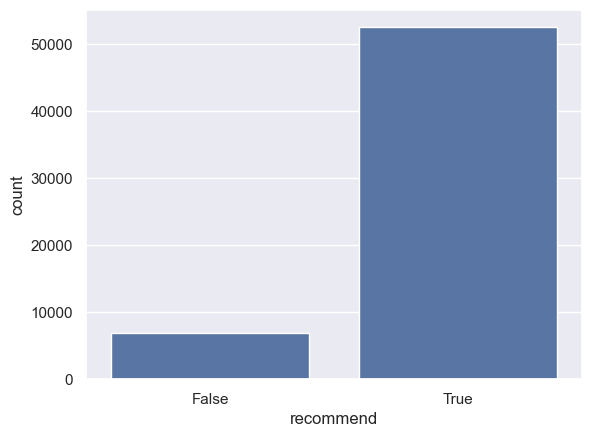

In [16]:
sns.countplot(reviews,x='recommend')
plt.show()

In [17]:
pruebas_rev_list = list(pruebas_rev["review"])

In [18]:
frase_test=pruebas_rev_list[2]

#tokeniza frases
frase_tkn = nltk.tokenize.sent_tokenize(frase_test)
print(frase_tkn)
print()

#tokeniza palabras
frase_tkn = nltk.tokenize.word_tokenize(frase_test.lower())
print(frase_tkn)

['Alan wake is a really good game, the light effects are pretty awesome and this game is so good, it paid back remedy their promotion and conversion fees in the first two days on steam.', 'Its awesome :D. Remedy can still make video games, even if its not Max Payne.', 'It is also very character driven.']

['alan', 'wake', 'is', 'a', 'really', 'good', 'game', ',', 'the', 'light', 'effects', 'are', 'pretty', 'awesome', 'and', 'this', 'game', 'is', 'so', 'good', ',', 'it', 'paid', 'back', 'remedy', 'their', 'promotion', 'and', 'conversion', 'fees', 'in', 'the', 'first', 'two', 'days', 'on', 'steam', '.', 'its', 'awesome', ':', 'd.', 'remedy', 'can', 'still', 'make', 'video', 'games', ',', 'even', 'if', 'its', 'not', 'max', 'payne', '.', 'it', 'is', 'also', 'very', 'character', 'driven', '.']


In [19]:
#Se usa re para limpiar el string 

frase_tkn = re.sub("[^a-zA-Z]", " ", frase_test)


In [20]:
frase_tkn

'Alan wake is a really good game  the light effects are pretty awesome and this game is so good  it paid back remedy their promotion and conversion fees in the first two days on steam  Its awesome  D  Remedy can still make video games  even if its not Max Payne  It is also very character driven '

In [21]:
frase_tkn = nltk.tokenize.word_tokenize(frase_tkn.lower())

In [22]:
frase_tkn
len(frase_tkn)

56

In [23]:
stopwords = nltk.corpus.stopwords.words("english")
frase_tkn = [word for word in frase_tkn if word not in stopwords]


In [24]:
len(frase_tkn)

33

In [25]:
#Frecuencia con que aparece cada palabra

freq = nltk.FreqDist(frase_tkn)
freq

FreqDist({'good': 2, 'game': 2, 'awesome': 2, 'remedy': 2, 'alan': 1, 'wake': 1, 'really': 1, 'light': 1, 'effects': 1, 'pretty': 1, ...})

In [26]:
# Lemminization

from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [27]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [28]:
"""frase_lem = [(lemmatizer.lemmatize(w, get_wordnet_pos(w))) for w in f]

tipo_palabra = [get_wordnet_pos(w) for w in frase_tkn]
for i in range(len(frase_tkn)):
    print ("{0:20}{1:20}{2:20}".format(frase_tkn[i],tipo_palabra[i],frase_lem[i]))"""

'frase_lem = [(lemmatizer.lemmatize(w, get_wordnet_pos(w))) for w in f]\n\ntipo_palabra = [get_wordnet_pos(w) for w in frase_tkn]\nfor i in range(len(frase_tkn)):\n    print ("{0:20}{1:20}{2:20}".format(frase_tkn[i],tipo_palabra[i],frase_lem[i]))'

In [29]:
# Applying lemmantization to all reviews

reviews_text = [word for word in reviews["review"]]

In [30]:
stopwords = nltk.corpus.stopwords.words("english")


In [31]:
def lemmatize_corpus(corpus:"list", language:'str'='english'):
    """Takes a LIST of text and returns it lemamatized, automatically drops
        non letter or punctuation characters, formats to lowercase and
        drops stopwords. """
    
    stopwords = nltk.corpus.stopwords.words(language)

    lemmatizer = nltk.stem.WordNetLemmatizer()

    list_normalized=[]

    def get_wordnet_pos(word):
            """Map POS tag to first character lemmatize() accepts"""
            tag = nltk.pos_tag([word])[0][1][0].upper()
            tag_dict = {"J": wordnet.ADJ,
                        "N": wordnet.NOUN,
                        "V": wordnet.VERB,
                        "R": wordnet.ADV}

            return tag_dict.get(tag, wordnet.NOUN)
    
    
    for sentence in corpus:

        normalized = re.sub("[^a-z]"," ",str(sentence.lower()))

        normalized = nltk.word_tokenize(normalized)

        normalized = [word for word in normalized if not word in stopwords]


        
        
        normalized = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in normalized]

        normalized = " ".join(normalized)

        list_normalized.append(normalized)

    return list_normalized

In [32]:
reviews_text[:10]

['Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.',
 "It's unique and worth a playthrough.",
 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!',
 'I know what you think when you see this title "Barbie Dreamhouse Party" but do not be intimidated by it\'s title, this is easily one of my GOTYs. You don\'t get any of that cliche game mechanics that all the latest games have, this is simply good core gameplay. Yes, you can\'t 360 noscope your friends, but what you can do is show them up with your bad ♥♥♥ dance moves and put them to shame as you show them what true fashion and color combinations are.I know this game says for kids but, this is easily for any age

In [33]:
reviews_text_lemmantized = lemmatize_corpus(reviews_text)

In [34]:
reviews_text_lemmantized[:20]

['simple yet great replayability opinion zombie horde team work well left dead plus global leveling system alot earth zombie splatter fun whole family amaze sort fps rare',
 'unique worth playthrough',
 'great atmosphere gunplay bit chunky time end day game definitely worth hope sequel buy game get sequel',
 'know think see title barbie dreamhouse party intimidate title easily one gotys get cliche game mechanic late game simply good core gameplay yes noscope friend show bad dance move put shame show true fashion color combination know game say kid easily age range age blast play',
 'simple actually simple truck drive simulator quite fun relax game play simple easy basic wasd key drive want game much harder realistic manually change gear much harder turn etc reverse game imagine would actual truck luckily reverse park get extra point cause bloody hard suprisingly nice truck drive game bit fun',
 'fun little game play bore time passer gud recommend pls buy',
 'suitably punish roguelike p

In [35]:
# Now we vectorize it

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=2000, ngram_range=(1,2))


In [36]:
words_matrix = vectorizer.fit_transform(reviews_text_lemmantized)

In [37]:
#Modelado:

x = words_matrix.toarray()
x.shape

(59298, 2000)

In [38]:
recommend = reviews["recommend"].values

In [39]:
y = recommend
recommend.shape

(59298,)

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["Not recommended","Recommended"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [42]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.3849915682967959


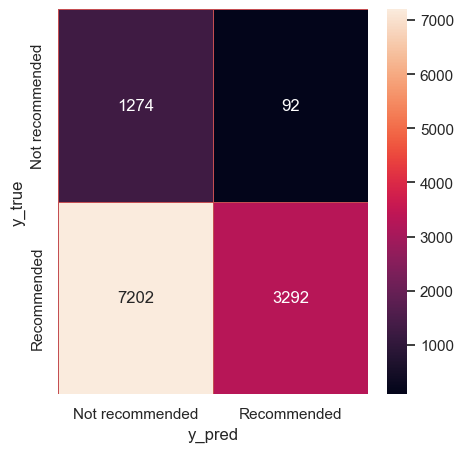

In [43]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.896964586846543


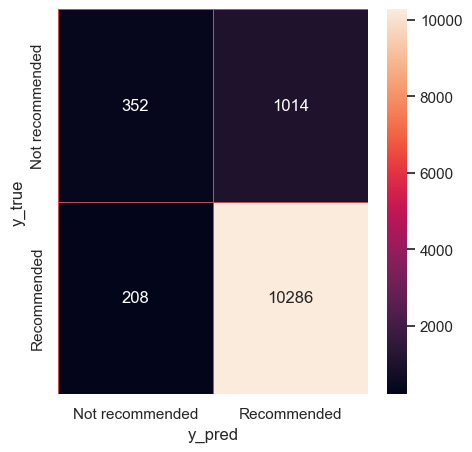

In [45]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

In [46]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1, dual=True, max_iter=1000)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

c:\Users\ignac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9068296795952783

In [47]:
mireview = "bad game poor quality"

In [48]:
mireview=lemmatize_corpus([mireview])

In [49]:
mireview

['bad game poor quality']

In [50]:
mireview=vectorizer.fit_transform(mireview)


In [51]:
from scipy.sparse import hstack
import scipy as sp
from scipy.sparse import csr_matrix 

In [52]:
ceros_para_rellenar = csr_matrix((mireview.shape[0], 2000 - mireview.shape[1]))
nueva_consulta_con_ceros = hstack([mireview, ceros_para_rellenar])

In [53]:
print(type(rf.predict(x)[:10]))

<class 'numpy.ndarray'>


In [54]:
sentiment = pd.DataFrame(rf.predict(x),columns=["likes"])
sentiment.rename({"0":"feelings"})

,likes
0,True
1,True
2,True
3,True
4,True
...,...
59293,True
59294,True
59295,True
59296,True


In [55]:
sentiment.rename({"feelings":"0"}, axis="columns")

,likes
0,True
1,True
2,True
3,True
4,True
...,...
59293,True
59294,True
59295,True
59296,True


In [56]:
sentiment.head()

,likes
0,True
1,True
2,True
3,True
4,True


In [57]:
reviews_sentiment = reviews.join(sentiment)

In [58]:


reviews_sentiment.drop(columns=["review"], inplace=True)

In [59]:
reviews_sentiment.head()

,funny,posted,last_edited,item_id,helpful,recommend,user_id,likes
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,76561197970982479,True
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,76561197970982479,True
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,76561197970982479,True
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,js41637,True
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,js41637,True
